In [92]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
import matplotlib.cm as cm
import seaborn as sns
import squarify

import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot 
from wordcloud import WordCloud
from PIL import Image
from sklearn.preprocessing import MultiLabelBinarizer

import matplotlib.colors
from collections import Counter
cmap2 = cm.get_cmap('twilight', 13)
colors1=[]
for i in range(cmap2.N):
    rgb = cmap2(i)[:4]
    colors1.append(rgb2hex(rgb))
sns.set(style='whitegrid')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#

/kaggle/input/hbo-max-tv-shows-and-movies/credits.csv
/kaggle/input/hbo-max-tv-shows-and-movies/titles.csv


In [93]:
df = pd.read_csv('/kaggle/input/hbo-max-tv-shows-and-movies/titles.csv')


In [94]:
df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"['fantasy', 'family']",['US'],NaN,tt0032138,8.1,389774.0,41.442,7.6
1,tm83648,Citizen Kane,MOVIE,"Newspaper magnate, Charles Foster Kane is take...",1941,PG,119,['drama'],['US'],NaN,tt0033467,8.3,433804.0,14.383,8.0
2,tm77588,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1942,PG,102,"['drama', 'romance', 'war']",['US'],NaN,tt0034583,8.5,558849.0,20.087,8.2
3,tm82363,The Big Sleep,MOVIE,Private Investigator Philip Marlowe is hired b...,1946,NaN,116,"['thriller', 'crime']",['US'],NaN,tt0038355,7.9,84494.0,12.911,7.7
4,tm84701,The Maltese Falcon,MOVIE,A private detective takes on a case that invol...,1941,NaN,100,"['thriller', 'romance', 'crime']",['US'],NaN,tt0033870,8.0,156603.0,12.788,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,tm1082718,Romeo Santos: Utopia Live from MetLife Stadium,MOVIE,In this Concert he focuses on the star and mos...,2021,NaN,103,"['romance', 'music']",['PR'],NaN,NaN,NaN,NaN,8.425,8.1
3290,tm1067128,Algo Azul,MOVIE,Romantic comedy...coming soon.,2021,NaN,90,['comedy'],['PA'],NaN,tt9257620,5.9,50.0,1.400,2.0
3291,tm1121489,Entre Nos: What She Said,MOVIE,A stand-up comedy special featuring Shari Diaz...,2021,NaN,28,['comedy'],[],NaN,tt15532762,NaN,NaN,NaN,NaN
3292,tm1121486,Entre Nos: The Winners 2,MOVIE,Comedy special starring winners of the second ...,2021,NaN,28,['comedy'],[],NaN,tt15532736,NaN,NaN,NaN,NaN


In [95]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [96]:
df.isna().sum()

id                         0
title                      0
type                       0
description               12
release_year               0
age_certification       1208
runtime                    0
genres                     0
production_countries       0
seasons                 2538
imdb_id                  326
imdb_score               372
imdb_votes               383
tmdb_popularity           33
tmdb_score               268
dtype: int64

In [97]:
df.count()

id                      3294
title                   3294
type                    3294
description             3282
release_year            3294
age_certification       2086
runtime                 3294
genres                  3294
production_countries    3294
seasons                  756
imdb_id                 2968
imdb_score              2922
imdb_votes              2911
tmdb_popularity         3261
tmdb_score              3026
dtype: int64

In [98]:
df.type.unique()

array(['MOVIE', 'SHOW'], dtype=object)

In [99]:
df.age_certification.unique()

array(['G', 'PG', nan, 'PG-13', 'R', 'TV-G', 'TV-Y', 'TV-PG', 'TV-Y7',
       'NC-17', 'TV-14', 'TV-MA'], dtype=object)

In [100]:
df.genres.unique()

array(["['fantasy', 'family']", "['drama']",
       "['drama', 'romance', 'war']", ...,
       "['fantasy', 'family', 'animation']",
       "['family', 'fantasy', 'animation', 'comedy']",
       "['romance', 'music']"], dtype=object)

In [101]:
shows = df[df['type'] == 'SHOW']
movies = df[df['type'] == 'MOVIE']

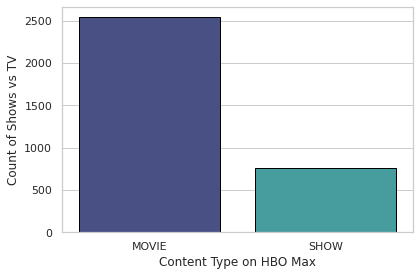

In [102]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='type', palette = 'mako', edgecolor='black')
plt.xlabel('Content Type on HBO Max')
plt.ylabel('Count of Shows vs TV')
plt.tight_layout()
plt.show()

In [103]:
ngtype = df['type'].value_counts().reset_index()
ngtype = ngtype.rename(columns={'type':'count', 'index':'type'})
ngtype

,type,count
0,MOVIE,2538
1,SHOW,756


In [104]:
t = go.Pie(values=ngtype['count'], labels=ngtype['type'], marker = dict(colors=['LightSkyBlue', 'MediumPurple']))
layout = go.Layout(height=500, legend=dict(x=0.1, y=1.1))
fig=go.Figure(data=[t], layout=layout)
iplot(fig)


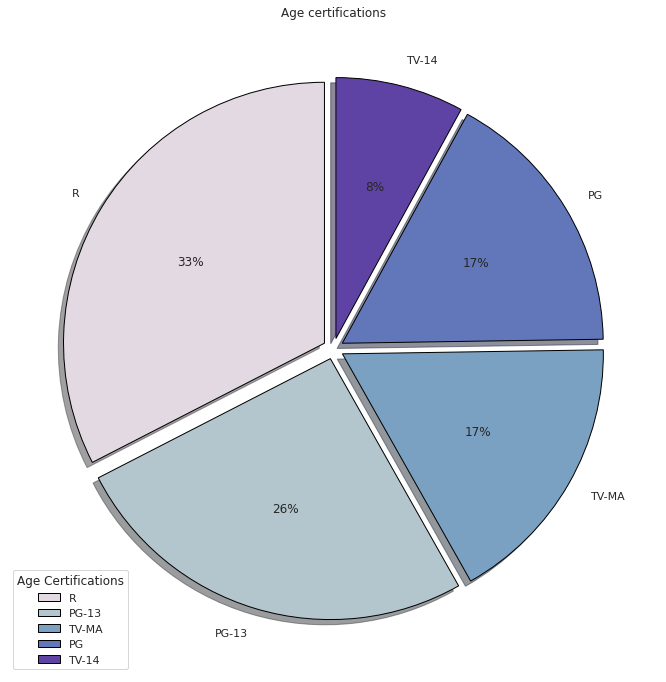

In [105]:
plt.figure(figsize=(18,12))
p_ratings = df['age_certification'].value_counts().head()
plt.pie(x=p_ratings, labels = p_ratings.index, colors=colors1,
       autopct="%.0f%%", explode=[0.04 for i in p_ratings.index], startangle=90,
       wedgeprops={'linewidth':1, 'edgecolor':'black'}, shadow=True)
plt.title('Age certifications')
plt.legend(loc='lower left', title='Age Certifications')
plt.show()

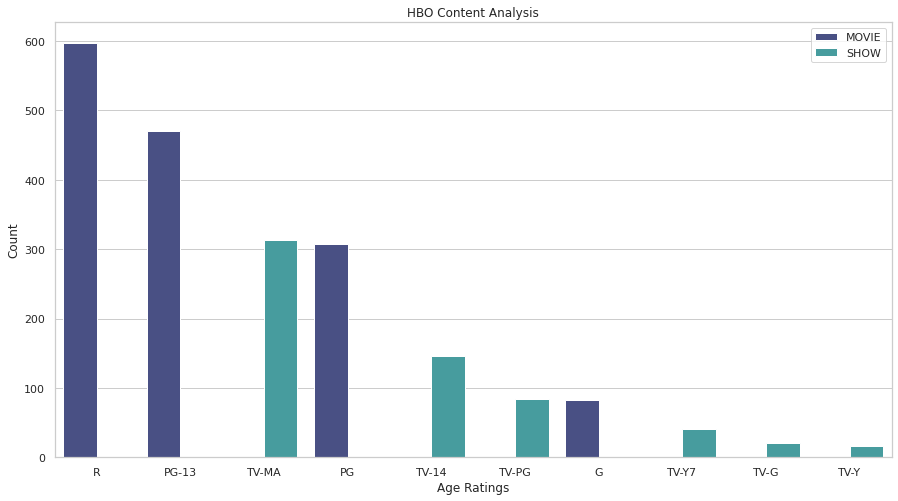

In [106]:
plt.figure(figsize=(15,8))
sns.countplot(x='age_certification', data=df, palette='mako',
             hue='type', order=df['age_certification'].value_counts().index[0:10])
plt.xlabel('Age Ratings')
plt.ylabel('Count')
plt.legend()
plt.title('HBO Content Analysis')
plt.show()

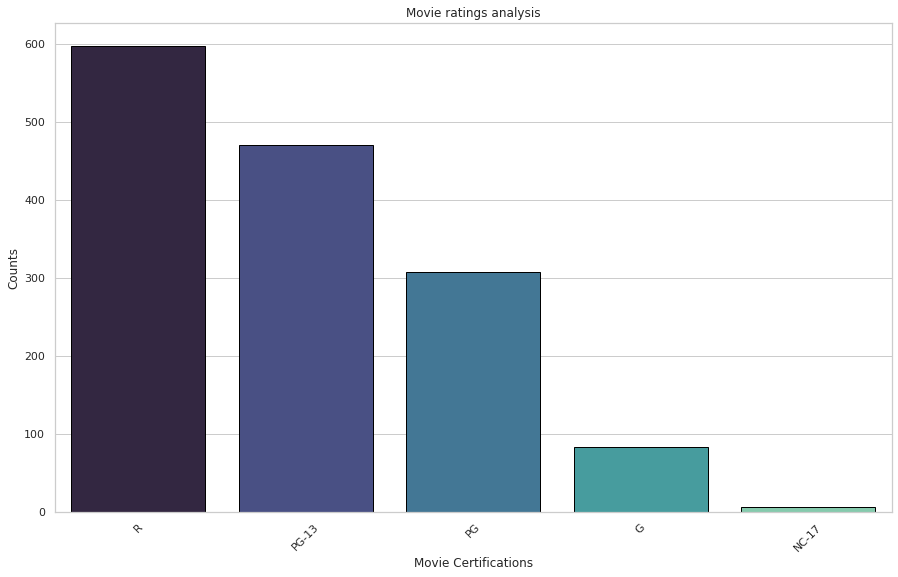

In [107]:
plt.figure(figsize=(15,9))
sns.countplot(x='age_certification', data=movies, palette='mako',
             order=movies['age_certification'].value_counts().index[0:10],
             edgecolor='black')
plt.xlabel('Movie Certifications')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.title("Movie ratings analysis")
plt.show()


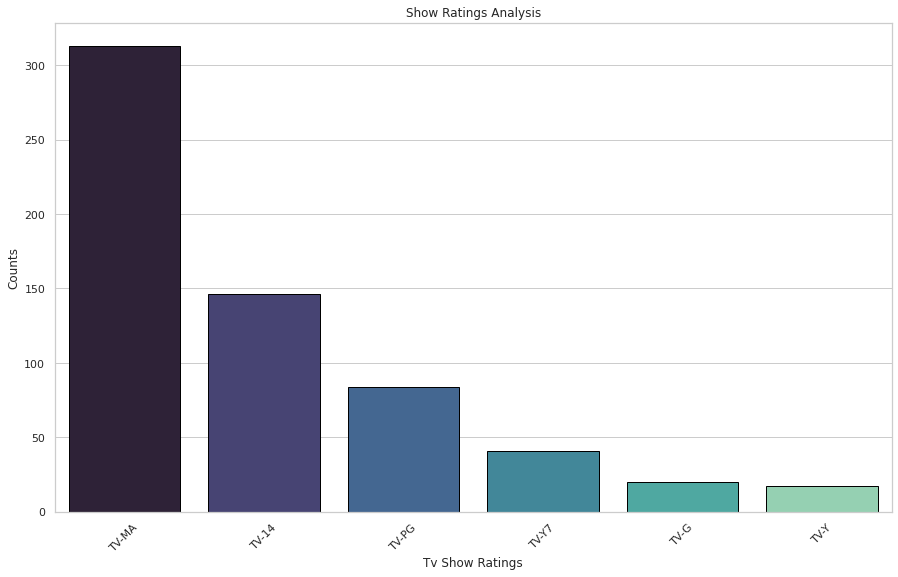

In [108]:
plt.figure(figsize=(15,9))
sns.countplot(x='age_certification', data=shows, palette='mako',
             order=shows['age_certification'].value_counts().index[0:], edgecolor='black')
plt.xlabel('Tv Show Ratings')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.title('Show Ratings Analysis')
plt.show()

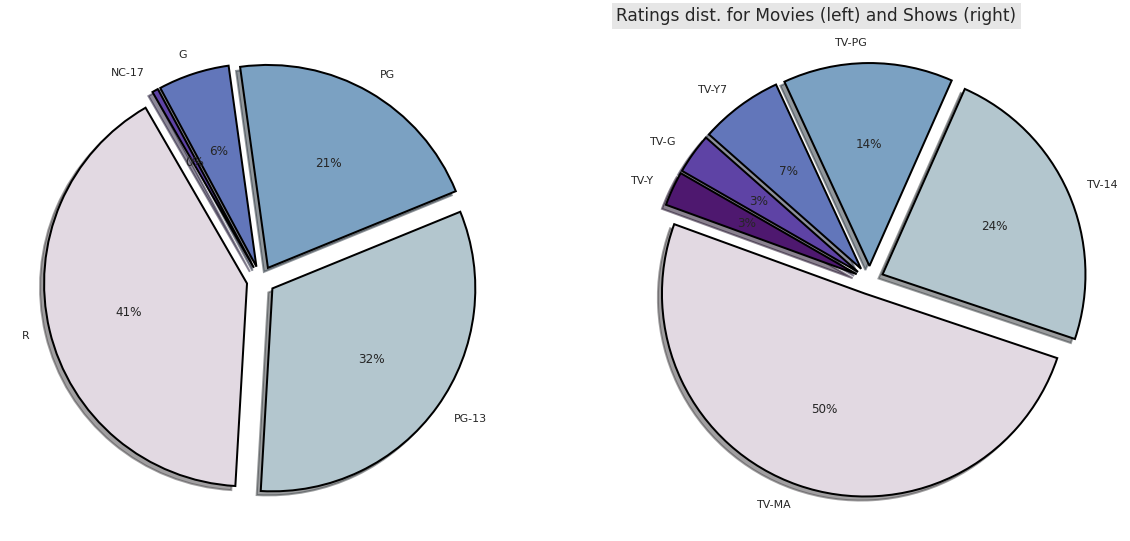

In [109]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(20,15))
npMovies = movies['age_certification'].value_counts().head(10)
npShows = shows['age_certification'].value_counts().head(10)

ax0.pie(x=npMovies, labels=npMovies.index, colors=colors1,
       autopct='%.0f%%', explode=[0.07 for i in npMovies.index],
       startangle=120, wedgeprops = {'linewidth':2, 'edgecolor':'black'},
       shadow=True)

ax1.pie(x=npShows, labels=npShows.index, colors=colors1,
       autopct="%.0f%%", explode=[0.07 for i in npShows.index],
       startangle=160, wedgeprops = {'linewidth':2, "edgecolor":'black'},
       shadow=True)

plt.title('Ratings dist. for Movies (left) and Shows (right)',
         bbox = {'facecolor':"0.9", 'pad':5}, loc='left', fontsize=17)

plt.show()


In [110]:
df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"['fantasy', 'family']",['US'],NaN,tt0032138,8.1,389774.0,41.442,7.6
1,tm83648,Citizen Kane,MOVIE,"Newspaper magnate, Charles Foster Kane is take...",1941,PG,119,['drama'],['US'],NaN,tt0033467,8.3,433804.0,14.383,8.0
2,tm77588,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1942,PG,102,"['drama', 'romance', 'war']",['US'],NaN,tt0034583,8.5,558849.0,20.087,8.2
3,tm82363,The Big Sleep,MOVIE,Private Investigator Philip Marlowe is hired b...,1946,NaN,116,"['thriller', 'crime']",['US'],NaN,tt0038355,7.9,84494.0,12.911,7.7
4,tm84701,The Maltese Falcon,MOVIE,A private detective takes on a case that invol...,1941,NaN,100,"['thriller', 'romance', 'crime']",['US'],NaN,tt0033870,8.0,156603.0,12.788,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,tm1082718,Romeo Santos: Utopia Live from MetLife Stadium,MOVIE,In this Concert he focuses on the star and mos...,2021,NaN,103,"['romance', 'music']",['PR'],NaN,NaN,NaN,NaN,8.425,8.1
3290,tm1067128,Algo Azul,MOVIE,Romantic comedy...coming soon.,2021,NaN,90,['comedy'],['PA'],NaN,tt9257620,5.9,50.0,1.400,2.0
3291,tm1121489,Entre Nos: What She Said,MOVIE,A stand-up comedy special featuring Shari Diaz...,2021,NaN,28,['comedy'],[],NaN,tt15532762,NaN,NaN,NaN,NaN
3292,tm1121486,Entre Nos: The Winners 2,MOVIE,Comedy special starring winners of the second ...,2021,NaN,28,['comedy'],[],NaN,tt15532736,NaN,NaN,NaN,NaN


In [111]:
def clean(txt):
    return txt[2:4]

In [112]:
df['Countries']  = df['production_countries'].apply(clean)

In [113]:
df['Countries']

0       US
1       US
2       US
3       US
4       US
        ..
3289    PR
3290    PA
3291      
3292      
3293    US
Name: Countries, Length: 3294, dtype: object

In [114]:
df.drop("production_countries", inplace=True, axis=1)

In [115]:
df

,id,title,type,description,release_year,age_certification,runtime,genres,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Countries
0,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"['fantasy', 'family']",NaN,tt0032138,8.1,389774.0,41.442,7.6,US
1,tm83648,Citizen Kane,MOVIE,"Newspaper magnate, Charles Foster Kane is take...",1941,PG,119,['drama'],NaN,tt0033467,8.3,433804.0,14.383,8.0,US
2,tm77588,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1942,PG,102,"['drama', 'romance', 'war']",NaN,tt0034583,8.5,558849.0,20.087,8.2,US
3,tm82363,The Big Sleep,MOVIE,Private Investigator Philip Marlowe is hired b...,1946,NaN,116,"['thriller', 'crime']",NaN,tt0038355,7.9,84494.0,12.911,7.7,US
4,tm84701,The Maltese Falcon,MOVIE,A private detective takes on a case that invol...,1941,NaN,100,"['thriller', 'romance', 'crime']",NaN,tt0033870,8.0,156603.0,12.788,7.8,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,tm1082718,Romeo Santos: Utopia Live from MetLife Stadium,MOVIE,In this Concert he focuses on the star and mos...,2021,NaN,103,"['romance', 'music']",NaN,NaN,NaN,NaN,8.425,8.1,PR
3290,tm1067128,Algo Azul,MOVIE,Romantic comedy...coming soon.,2021,NaN,90,['comedy'],NaN,tt9257620,5.9,50.0,1.400,2.0,PA
3291,tm1121489,Entre Nos: What She Said,MOVIE,A stand-up comedy special featuring Shari Diaz...,2021,NaN,28,['comedy'],NaN,tt15532762,NaN,NaN,NaN,NaN,
3292,tm1121486,Entre Nos: The Winners 2,MOVIE,Comedy special starring winners of the second ...,2021,NaN,28,['comedy'],NaN,tt15532736,NaN,NaN,NaN,NaN,


0


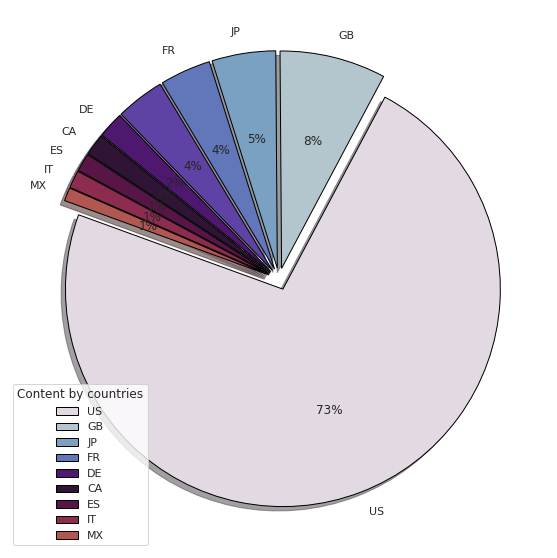

In [116]:
print(df['Countries'].isna().sum())
country = df.Countries.value_counts().head(10)

plt.figure(figsize=(15,10))
plt.pie(x=country, labels=country.index, colors=colors1, 
       autopct='%.0f%%', explode=[0.05 for i in country.index],
       startangle=160, wedgeprops={'linewidth':1, 'edgecolor':'black'},
       shadow=True)
plt.legend(title='Content by countries', loc='lower left')
plt.show()

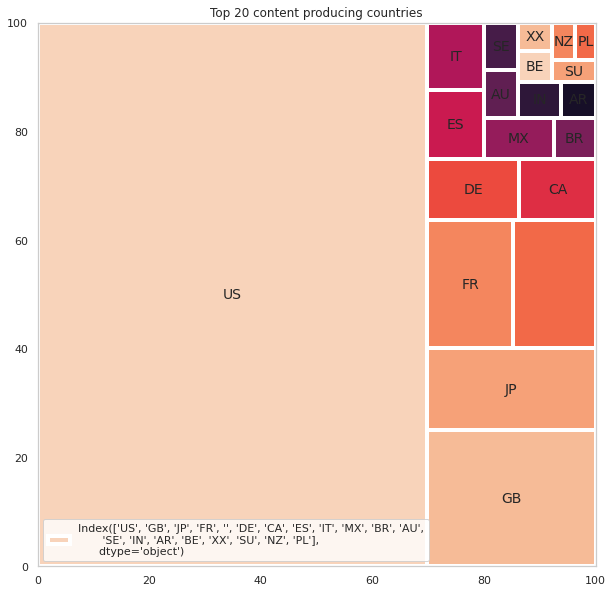

In [117]:
fig = plt.figure(figsize=(10,10))
countries2 = pd.Series(df.Countries.value_counts().head(20))
squarify.plot(sizes=countries2.values, label=countries2.index,
              color=sns.color_palette("rocket_r", n_colors=15),
             linewidth=4, text_kwargs={'fontsize':14,'fontweight':14})
plt.title('Top 20 content producing countries')
plt.legend(loc='lower left')
plt.show()

In [118]:
df

,id,title,type,description,release_year,age_certification,runtime,genres,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Countries
0,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"['fantasy', 'family']",NaN,tt0032138,8.1,389774.0,41.442,7.6,US
1,tm83648,Citizen Kane,MOVIE,"Newspaper magnate, Charles Foster Kane is take...",1941,PG,119,['drama'],NaN,tt0033467,8.3,433804.0,14.383,8.0,US
2,tm77588,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1942,PG,102,"['drama', 'romance', 'war']",NaN,tt0034583,8.5,558849.0,20.087,8.2,US
3,tm82363,The Big Sleep,MOVIE,Private Investigator Philip Marlowe is hired b...,1946,NaN,116,"['thriller', 'crime']",NaN,tt0038355,7.9,84494.0,12.911,7.7,US
4,tm84701,The Maltese Falcon,MOVIE,A private detective takes on a case that invol...,1941,NaN,100,"['thriller', 'romance', 'crime']",NaN,tt0033870,8.0,156603.0,12.788,7.8,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,tm1082718,Romeo Santos: Utopia Live from MetLife Stadium,MOVIE,In this Concert he focuses on the star and mos...,2021,NaN,103,"['romance', 'music']",NaN,NaN,NaN,NaN,8.425,8.1,PR
3290,tm1067128,Algo Azul,MOVIE,Romantic comedy...coming soon.,2021,NaN,90,['comedy'],NaN,tt9257620,5.9,50.0,1.400,2.0,PA
3291,tm1121489,Entre Nos: What She Said,MOVIE,A stand-up comedy special featuring Shari Diaz...,2021,NaN,28,['comedy'],NaN,tt15532762,NaN,NaN,NaN,NaN,
3292,tm1121486,Entre Nos: The Winners 2,MOVIE,Comedy special starring winners of the second ...,2021,NaN,28,['comedy'],NaN,tt15532736,NaN,NaN,NaN,NaN,


In [119]:
df['genres'] = df['genres'].str[1:-1]

df['genre_new'] = df['genres'].str.split(',').str[0]

In [121]:
df = df.drop('genres', axis=1)
df

,id,title,type,description,release_year,age_certification,runtime,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Countries,genre_new
0,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,NaN,tt0032138,8.1,389774.0,41.442,7.6,US,'fantasy'
1,tm83648,Citizen Kane,MOVIE,"Newspaper magnate, Charles Foster Kane is take...",1941,PG,119,NaN,tt0033467,8.3,433804.0,14.383,8.0,US,'drama'
2,tm77588,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1942,PG,102,NaN,tt0034583,8.5,558849.0,20.087,8.2,US,'drama'
3,tm82363,The Big Sleep,MOVIE,Private Investigator Philip Marlowe is hired b...,1946,NaN,116,NaN,tt0038355,7.9,84494.0,12.911,7.7,US,'thriller'
4,tm84701,The Maltese Falcon,MOVIE,A private detective takes on a case that invol...,1941,NaN,100,NaN,tt0033870,8.0,156603.0,12.788,7.8,US,'thriller'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,tm1082718,Romeo Santos: Utopia Live from MetLife Stadium,MOVIE,In this Concert he focuses on the star and mos...,2021,NaN,103,NaN,NaN,NaN,NaN,8.425,8.1,PR,'romance'
3290,tm1067128,Algo Azul,MOVIE,Romantic comedy...coming soon.,2021,NaN,90,NaN,tt9257620,5.9,50.0,1.400,2.0,PA,'comedy'
3291,tm1121489,Entre Nos: What She Said,MOVIE,A stand-up comedy special featuring Shari Diaz...,2021,NaN,28,NaN,tt15532762,NaN,NaN,NaN,NaN,,'comedy'
3292,tm1121486,Entre Nos: The Winners 2,MOVIE,Comedy special starring winners of the second ...,2021,NaN,28,NaN,tt15532736,NaN,NaN,NaN,NaN,,'comedy'


In [134]:
df.genre_new = df['genre_new'].str.strip(" '' ")


In [135]:
df

,id,title,type,description,release_year,age_certification,runtime,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Countries,genre_new
0,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,NaN,tt0032138,8.1,389774.0,41.442,7.6,US,fantasy
1,tm83648,Citizen Kane,MOVIE,"Newspaper magnate, Charles Foster Kane is take...",1941,PG,119,NaN,tt0033467,8.3,433804.0,14.383,8.0,US,drama
2,tm77588,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1942,PG,102,NaN,tt0034583,8.5,558849.0,20.087,8.2,US,drama
3,tm82363,The Big Sleep,MOVIE,Private Investigator Philip Marlowe is hired b...,1946,NaN,116,NaN,tt0038355,7.9,84494.0,12.911,7.7,US,thriller
4,tm84701,The Maltese Falcon,MOVIE,A private detective takes on a case that invol...,1941,NaN,100,NaN,tt0033870,8.0,156603.0,12.788,7.8,US,thriller
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,tm1082718,Romeo Santos: Utopia Live from MetLife Stadium,MOVIE,In this Concert he focuses on the star and mos...,2021,NaN,103,NaN,NaN,NaN,NaN,8.425,8.1,PR,romance
3290,tm1067128,Algo Azul,MOVIE,Romantic comedy...coming soon.,2021,NaN,90,NaN,tt9257620,5.9,50.0,1.400,2.0,PA,comedy
3291,tm1121489,Entre Nos: What She Said,MOVIE,A stand-up comedy special featuring Shari Diaz...,2021,NaN,28,NaN,tt15532762,NaN,NaN,NaN,NaN,,comedy
3292,tm1121486,Entre Nos: The Winners 2,MOVIE,Comedy special starring winners of the second ...,2021,NaN,28,NaN,tt15532736,NaN,NaN,NaN,NaN,,comedy


There are 20 genres


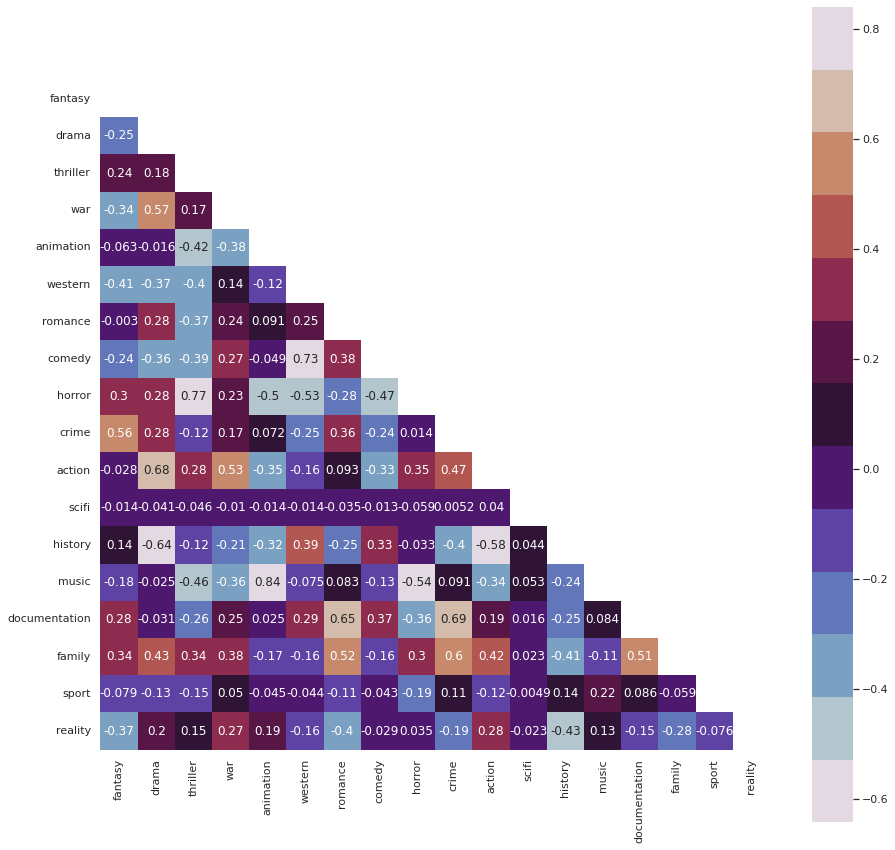

In [201]:
'''
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types".format(len(Types),title))    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(15, 12))
   
    pl = sns.heatmap(corr, mask=mask, cmap=colors1, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    
    plt.show()
'''
genres = list(df.genre_new.unique())
print("There are {} genres".format(len(genres)))
test = df['genre_new']
mlb = MultiLabelBinarizer()
genres_df = pd.DataFrame(mlb.fit_transform(test), columns= ['fantasy', 'drama', 'thriller', 'war', 'animation', 'western', 'romance', 'comedy', 'horror', 'crime', 'action', 'scifi', 'history', 'music', 'documentation', 'family', 'sport', 'reality'], index = test.index)
corr = genres_df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
htmap = sns.heatmap(corr,annot=True, mask=mask, cmap=colors1, square=True)
plt.show()


In [211]:
t = str(list(df['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

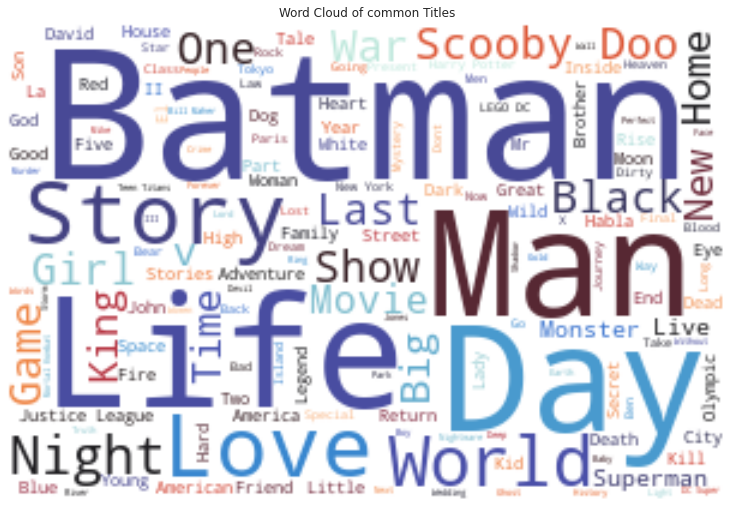

In [214]:
wordcloud = WordCloud(background_color='white',
                     width= 300, height = 200,
                     colormap='icefire', max_words=150).generate(t)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Word Cloud of common Titles')
plt.show()

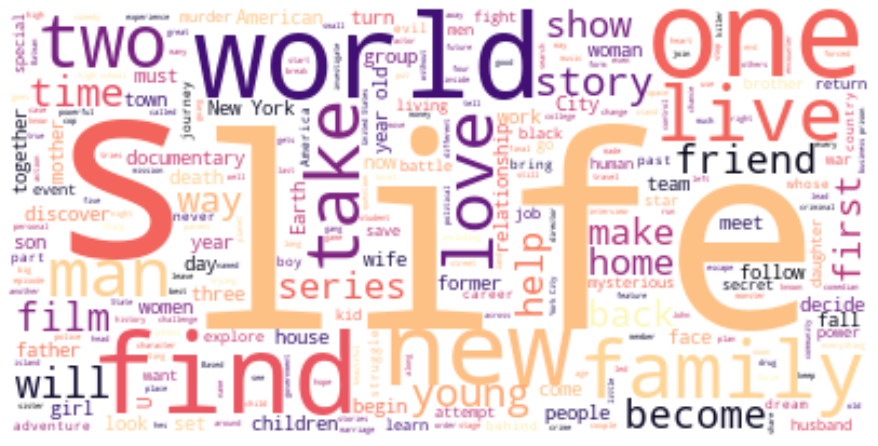

In [223]:
desc = str(list(df['description'])).replace(',', '').replace('[','').replace("'",'').replace(']','').replace('.','')
wordcloud2 = WordCloud(width=400, height=200, background_color='white', colormap='magma',
                     max_words=300).generate(desc)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud2, interpolation='bilinear')

plt.axis('off')
plt.tight_layout(pad=0)
plt.show()